Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM
import Optimized_IPVisibilityPRM_Roundtrip
import Grid_IPVisibilityPRM_Roundtrip
import CC_IPVisibilityPRM_Roundtrip

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [Grid_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/stand_13.1/RKIM23RobotProgramDS/02_eigeneNotebooks/IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[1:5]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

Erstes Ziel Interim:[[4, 4], 11.0, 'interim2']
try-Pfad nach Löschung von Start:  [1, 'interim2']
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [4, 15]
step [1.4197152803270117, 6.317208798372391]
******* Check Edges for Collision
Collison zwischen 1   start

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [2, 'interim2']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [4, 15]
step [3.7637916980726485, 5.611063528650398]
******* Check Edges for Collision
Collison zwischen 2   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [4, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [4, 15]
step [1.1673868066532966, 4.071461429286784]
******* Check Edges for Collision
Collison zwischen 4   start

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [8, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [4, 15]
step [0.4315892401516843, 11.96793031211738]
******* Check Edges for Collision
Collison zwischen 8   start

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [0, 7, 'interim2']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [4, 15]
step [14.130782172998048, 19.97250673305765]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 5.545417598069425, 'interim1']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [14.130782172998048, 19.97250673305765]
step [10.73504349449349, 7.170290258743998]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 7.44389355091851, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [10.73504349449349, 7.170290258743998]
step [4, 4]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['start', 0, 7, 'interim2']
Modifizierter Pfad:  ['start', 0, 7, 'interim2']
checkedInterimGoalList:  [[18, 3], [18, 16], [4, 4], [18, 1]]
checkedInterimGoalList:  [[18, 3], [18, 16], [18, 1]]
Gerade entfernt:  [4, 4]
Neues Ziel-Interim verfügbar!:  [[18, 3], 14.035668847618199, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 6, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [4, 4]
step [21.88903858037897, 0.6760468424914314]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 3.9025077486067645, 'interim3']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [21.88903858037897, 0.6760468424914314]
step [18, 3]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim2', 6, 'interim0']
Modifizierter Pfad:  ['start', 0, 7, 'interim2', 6, 'interim0']
checkedInterimGoalList:  [[18, 3], [18, 16], [18, 1]]
checkedInterimGoalList:  [[18, 16], [18, 1]]
Gerade entfernt:  [18, 3]
Neues Ziel-Interim verfügbar!:  [[18, 1], 2.0, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 3, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [18, 3]
step [15.06757526440291, 8.91829807012748]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.664829877662115, 'interim1']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [15.06757526440291, 8.91829807012748]
step [18, 1]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 3, 'interim3']
Modifizierter Pfad:  ['start', 0, 7, 'interim2', 6, 'interim0', 3, 'interim3']
checkedInterimGoalList:  [[18, 16], [18, 1]]
checkedInterimGoalList:  [[18, 16]]
Gerade entfernt:  [18, 1]
Neues Ziel-Interim verfügbar!:  [[18, 16], 15.0, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 3, 'interim1']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [18, 1]
step [15.06757526440291, 8.91829807012748]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.664829877662115, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [15.06757526440291, 8.91829807012748]
step [18, 16]
******* Check Edges for Collision
Collison zwischen interim1   3

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [0, 'interim1']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [15.06757526440291, 8.91829807012748]
step [14.130782172998048, 19.97250673305765]
******* Check Edges for Collision
Collison zwischen 0   3

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [6, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [15.06757526440291, 8.91829807012748]
step [21.88903858037897, 0.6760468424914314]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 15.80974893707022, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [21.88903858037897, 0.6760468424914314]
step [18, 16]
******* Check Edges for Collision
Collison zwischen interim1   6

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [7, 0, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [21.88903858037897, 0.6760468424914314]
step [10.73504349449349, 7.170290258743998]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 11.434306587709308, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10.73504349449349, 7.170290258743998]
step [14.130782172998048, 19.97250673305765]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 5.545417598069425, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [14.130782172998048, 19.97250673305765]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim3', 3, 6, 7, 0, 'interim1']
Modifizierter Pfad:  ['start', 0, 7, 'interim2', 6, 'interim0', 3, 'interim3', 3, 6, 7, 0, 'interim1']


Erstes Ziel Interim:[[18, 16], 14.866068747318506, 'interim2']
try-Pfad nach Löschung von Start:  [5, 0, 'interim2']
While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [4, 21]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 7.919372072524126, 'interim2']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 1.7343187521710204, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['start', 5, 0, 'interim2']
Modifizierter Pfad:  ['start', 5, 0, 'interim2']
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 16], [18, 1]]
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 1]]
Gerade entfernt:  [18, 16]
Neues Ziel-Interim verfügbar!:  [[18, 4], 12.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 0, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [18, 16]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.752429743913858, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [18, 4]
******* Check Edges for Collision
Collison zwischen interim0   0

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [14.066061012321375, 9.983437296786239]
Removed nodeNumber mit Koordinaten: [14.066061012321375, 9.983437296786239]
Remove Nodenumer:  3

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [20.109078542372497, 15.928641438970544]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.113657535089118, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [20.109078542372497, 15.928641438970544]
step [18, 4]
******* Check Edges for Collision
Collison zwischen interim0   7

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [18, 'interim0']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [20.109078542372497, 15.928641438970544]
step [21.477184870725196, 3.512627328369463]
******* Check Edges for Collision
Collison zwischen 18   7

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [16, 18, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [20.109078542372497, 15.928641438970544]
step [14.523147584581839, 12.624517759309446]
Removed nodeNumber mit Koordinaten: [14.523147584581839, 12.624517759309446]
Remove Nodenumer:  16

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: ['interim2', 18, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [20.109078542372497, 15.928641438970544]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  18
Path im Check and CollisonUpdate [18, 16]
step [21.477184870725196, 3.512627328369463]
******* Check Edges for Collision
Collison zwischen 18   interim2

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [35, 21, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [18, 16]
step [15.781030402742372, 10.30699043487877]
Removed nodeNumber mit Koordinaten: [15.781030402742372, 10.30699043487877]
Remove Nodenumer:  35

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [42, 38, 'interim0']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [18, 16]
step [19.34757351612947, 14.872103935717147]
Removed nodeNumber mit Koordinaten: [19.34757351612947, 14.872103935717147]
Remove Nodenumer:  42

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [44, 38, 'interim0']

While beginnt


Aktueller Node (step):  44
Path im Check and CollisonUpdate [18, 16]
step [16.3224222427824, 10.887518720427439]
Removed nodeNumber mit Koordinaten: [16.3224222427824, 10.887518720427439]
Remove Nodenumer:  44

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [49, 38, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [18, 16]
step [19.210831607172455, 11.473656634933738]
Removed nodeNumber mit Koordinaten: [19.210831607172455, 11.473656634933738]
Remove Nodenumer:  49

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [47, 50, 38, 'interim0']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [18, 16]
step [16.885118699860918, 13.907492240614651]
Removed nodeNumber mit Koordinaten: [16.885118699860918, 13.907492240614651]
Remove Nodenumer:  47

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [51, 50, 21, 'interim0']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [18, 16]
step [19.487713533894777, 15.462276932483139]
Removed nodeNumber mit Koordinaten: [19.487713533894777, 15.462276932483139]
Remove Nodenumer:  51

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [58, 50, 38, 'interim0']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [18, 16]
step [16.286351281854362, 12.832983271629333]
Removed nodeNumber mit Koordinaten: [16.286351281854362, 12.832983271629333]
Remove Nodenumer:  58

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [0, 6, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [18, 16]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.752429743913858, 'interim0']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [8.51581163013636, 9.512899543099492]
Removed nodeNumber mit Koordinaten: [8.51581163013636, 9.512899543099492]
Remove Nodenumer:  6

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [4, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [9.613715889999838, 11.464722130225553]
Removed nodeNumber mit Koordinaten: [9.613715889999838, 11.464722130225553]
Remove Nodenumer:  4

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [5, 1, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.850674931953748, 'interim1']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [2.5784356541366478, 12.718472804176436]
Removed nodeNumber mit Koordinaten: [2.5784356541366478, 12.718472804176436]
Remove Nodenumer:  1

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [26, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [12.556422600803142, 11.314866821773872]
Removed nodeNumber mit Koordinaten: [12.556422600803142, 11.314866821773872]
Remove Nodenumer:  26

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [9, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [3.680466427130124, 14.303565512700159]
Removed nodeNumber mit Koordinaten: [3.680466427130124, 14.303565512700159]
Remove Nodenumer:  9

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [14, 34, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [11.79761461186784, 15.352357729253516]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.93621314434241, 'interim0']


Aktueller Node (step):  34
Path im Check and CollisonUpdate [11.79761461186784, 15.352357729253516]
step [9.673910021749965, 9.853839437779426]
Removed nodeNumber mit Koordinaten: [9.673910021749965, 9.853839437779426]
Remove Nodenumer:  34

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [41, 99, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  41
Path im Check and CollisonUpdate [11.79761461186784, 15.352357729253516]
step [11.664586369265106, 12.131047883143216]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 10.307832243030989, 'interim0']


Aktueller Node (step):  99
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [13.108049968532015, 8.896993597322561]
Removed nodeNumber mit Koordinaten: [13.108049968532015, 8.896993597322561]
Remove Nodenumer:  99

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [5, 2, 11, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Collison zwischen 5   41

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [70, 107, 114, 33, 'interim0']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [13.965631515859746, 12.856137903001484]
Removed nodeNumber mit Koordinaten: [13.965631515859746, 12.856137903001484]
Remove Nodenumer:  70

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [105, 107, 114, 33, 'interim0']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [14.064477804299035, 12.488146988577835]
Removed nodeNumber mit Koordinaten: [14.064477804299035, 12.488146988577835]
Remove Nodenumer:  105

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [124, 43, 'interim0']

While beginnt


Aktueller Node (step):  124
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [13.979936207696062, 9.063059284654114]
Removed nodeNumber mit Koordinaten: [13.979936207696062, 9.063059284654114]
Remove Nodenumer:  124

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [126, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  126
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [10.034078822834386, 9.101622423181407]
Removed nodeNumber mit Koordinaten: [10.034078822834386, 9.101622423181407]
Remove Nodenumer:  126

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [133, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  133
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [15.007416020925389, 11.975939711973277]
Removed nodeNumber mit Koordinaten: [15.007416020925389, 11.975939711973277]
Remove Nodenumer:  133

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [112, 36, 32, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  112
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [8.035047274811479, 12.951483622644282]
Removed nodeNumber mit Koordinaten: [8.035047274811479, 12.951483622644282]
Remove Nodenumer:  112

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [14, 'interim2', 107, 114, 33, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [11.79761461186784, 15.352357729253516]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.93621314434241, 'interim0']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [11.79761461186784, 15.352357729253516]
step [18, 16]
******* Check Edges for Collision
Collison zwischen interim2   14

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [0, 89, 129, 33, 'interim0']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [11.79761461186784, 15.352357729253516]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.752429743913858, 'interim0']


Aktueller Node (step):  89
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [20.609811742170702, 14.853307857417937]
Removed nodeNumber mit Koordinaten: [20.609811742170702, 14.853307857417937]
Remove Nodenumer:  89

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: ['interim2', 107, 114, 33, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  107
Path im Check and CollisonUpdate [18, 16]
step [17.11846253467322, 13.328242658658688]
Removed nodeNumber mit Koordinaten: [17.11846253467322, 13.328242658658688]
Remove Nodenumer:  107

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [29, 13, 11, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [18, 16]
step [17.536204333239642, 19.088588923938737]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 15.095715356885622, 'interim0']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [17.536204333239642, 19.088588923938737]
step [9.33602262542412, 16.75162287555342]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.823061289720718, 'interim1']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [9.33602262542412, 16.75162287555342]
step [1.9763566834497142, 18.279886475795013]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 14.422561840193717, 'interim1']


Aktueller Node (step):  10
Path im Check and CollisonUpdate [1.9763566834497142, 18.279886475795013]
step [1.0107835147462803, 3.4031720732021276]
******* Check Edges for Collision
Collison zwischen 10   11

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [30, 32, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [1.9763566834497142, 18.279886475795013]
step [2.702043599765921, 13.945119447643325]
Removed nodeNumber mit Koordinaten: [2.702043599765921, 13.945119447643325]
Remove Nodenumer:  30

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [37, 46, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [1.9763566834497142, 18.279886475795013]
step [2.7474166302585203, 14.108558519104623]
Removed nodeNumber mit Koordinaten: [2.7474166302585203, 14.108558519104623]
Remove Nodenumer:  37

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [57, 68, 46, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [1.9763566834497142, 18.279886475795013]
step [0.5075719019910425, 14.747157017095608]
Removed nodeNumber mit Koordinaten: [0.5075719019910425, 14.747157017095608]
Remove Nodenumer:  57

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [25, 62, 36, 32, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [1.9763566834497142, 18.279886475795013]
step [5.68841159333376, 16.53473239039363]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.647934606380877, 'interim1']


Aktueller Node (step):  62
Path im Check and CollisonUpdate [5.68841159333376, 16.53473239039363]
step [6.386582028926187, 14.451819442967368]
Removed nodeNumber mit Koordinaten: [6.386582028926187, 14.451819442967368]
Remove Nodenumer:  62

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [95, 36, 32, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  95
Path im Check and CollisonUpdate [5.68841159333376, 16.53473239039363]
step [3.372910414201587, 13.506057050414082]
Removed nodeNumber mit Koordinaten: [3.372910414201587, 13.506057050414082]
Remove Nodenumer:  95

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [52, 41, 165, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [5.68841159333376, 16.53473239039363]
step [9.103977616998202, 15.550632214245994]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.628051792085586, 'interim1']


Aktueller Node (step):  41
Path im Check and CollisonUpdate [9.103977616998202, 15.550632214245994]
step [11.664586369265106, 12.131047883143216]
******* Check Edges for Collision
Collison zwischen 41   52

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [119, 165, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  119
Path im Check and CollisonUpdate [9.103977616998202, 15.550632214245994]
step [10.395361385087778, 12.353802463397617]
Removed nodeNumber mit Koordinaten: [10.395361385087778, 12.353802463397617]
Remove Nodenumer:  119

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [40, 41, 165, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [9.103977616998202, 15.550632214245994]
step [11.657201024765046, 15.2363705166191]
******* Check Edges for Collision
Collison zwischen 40   52

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [14, 41, 165, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [9.103977616998202, 15.550632214245994]
step [11.79761461186784, 15.352357729253516]
******* Check Edges for Collision
Collison zwischen 14   52

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [144, 41, 165, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  144
Path im Check and CollisonUpdate [9.103977616998202, 15.550632214245994]
step [9.961570725542915, 13.43344178436179]
Removed nodeNumber mit Koordinaten: [9.961570725542915, 13.43344178436179]
Remove Nodenumer:  144

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [5, 0, 75, 197, 38, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [9.103977616998202, 15.550632214245994]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.850674931953748, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.752429743913858, 'interim0']


Aktueller Node (step):  75
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [17.67176262470734, 14.708310633096703]
Removed nodeNumber mit Koordinaten: [17.67176262470734, 14.708310633096703]
Remove Nodenumer:  75

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [14, 41, 165, 54, 21, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [11.79761461186784, 15.352357729253516]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.93621314434241, 'interim0']


Aktueller Node (step):  41
Path im Check and CollisonUpdate [11.79761461186784, 15.352357729253516]
step [11.664586369265106, 12.131047883143216]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 10.307832243030989, 'interim0']


Aktueller Node (step):  165
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [12.387696987391438, 9.610727827335499]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 7.935881290554444, 'interim0']


Aktueller Node (step):  54
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [15.461850394087922, 8.38900930962348]
Removed nodeNumber mit Koordinaten: [15.461850394087922, 8.38900930962348]
Remove Nodenumer:  54

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [73, 43, 'interim0']

While beginnt


Aktueller Node (step):  73
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [10.60118080676198, 6.467767362863776]
******* Check Edges for Collision
Collison zwischen 73   165

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [223, 216, 'interim0']

While beginnt


Aktueller Node (step):  223
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [14.391958892490585, 7.54552554376557]
Removed nodeNumber mit Koordinaten: [14.391958892490585, 7.54552554376557]
Remove Nodenumer:  223

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [182, 73, 43, 'interim0']

While beginnt


Aktueller Node (step):  182
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [9.508056212896319, 9.152363249733133]
Removed nodeNumber mit Koordinaten: [9.508056212896319, 9.152363249733133]
Remove Nodenumer:  182

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [226, 197, 38, 'interim0']

While beginnt


Aktueller Node (step):  226
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [15.658008853468832, 11.086369133325185]
Removed nodeNumber mit Koordinaten: [15.658008853468832, 11.086369133325185]
Remove Nodenumer:  226

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [41, 40, 0, 59, 231, 50, 21, 'interim0']

While beginnt


Aktueller Node (step):  41
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [11.664586369265106, 12.131047883143216]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 10.307832243030989, 'interim0']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [11.657201024765046, 15.2363705166191]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.90298884859584, 'interim0']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [11.657201024765046, 15.2363705166191]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.752429743913858, 'interim0']


Aktueller Node (step):  59
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [17.29839058018812, 15.907665027218385]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 11.928316820843106, 'interim0']


Aktueller Node (step):  231
Path im Check and CollisonUpdate [17.29839058018812, 15.907665027218385]
step [16.97013020709786, 12.420901174170334]
Removed nodeNumber mit Koordinaten: [16.97013020709786, 12.420901174170334]
Remove Nodenumer:  231

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [0, 5, 25, 161, 128, 101, 32, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [17.29839058018812, 15.907665027218385]
step [16.39237388205402, 16.65069178497195]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.752429743913858, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [16.39237388205402, 16.65069178497195]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.850674931953748, 'interim1']


Aktueller Node (step):  25
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [5.68841159333376, 16.53473239039363]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.647934606380877, 'interim1']


Aktueller Node (step):  161
Path im Check and CollisonUpdate [5.68841159333376, 16.53473239039363]
step [5.087852256345209, 15.647684415891808]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.698374877898393, 'interim1']


Aktueller Node (step):  128
Path im Check and CollisonUpdate [5.087852256345209, 15.647684415891808]
step [2.9960785592132506, 14.32371146695207]
Removed nodeNumber mit Koordinaten: [2.9960785592132506, 14.32371146695207]
Remove Nodenumer:  128

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [146, 68, 46, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  146
Path im Check and CollisonUpdate [5.087852256345209, 15.647684415891808]
step [3.7372441616687855, 14.58216628444949]
Removed nodeNumber mit Koordinaten: [3.7372441616687855, 14.58216628444949]
Remove Nodenumer:  146

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [194, 68, 46, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  194
Path im Check and CollisonUpdate [5.087852256345209, 15.647684415891808]
step [3.454248510452989, 15.174193508877368]
Removed nodeNumber mit Koordinaten: [3.454248510452989, 15.174193508877368]
Remove Nodenumer:  194

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [190, 208, 68, 46, 10, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  190
Path im Check and CollisonUpdate [5.087852256345209, 15.647684415891808]
step [2.769370605871627, 16.652439283245204]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.71214649545462, 'interim1']


Aktueller Node (step):  208
Path im Check and CollisonUpdate [2.769370605871627, 16.652439283245204]
step [2.7980095455374965, 14.54424192694516]
Removed nodeNumber mit Koordinaten: [2.7980095455374965, 14.54424192694516]
Remove Nodenumer:  208

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [131, 187, 163, 88, 'interim1', 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  131
Path im Check and CollisonUpdate [2.769370605871627, 16.652439283245204]
step [2.306312005402657, 17.277259317857578]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.384849420769703, 'interim1']


Aktueller Node (step):  187
Path im Check and CollisonUpdate [2.306312005402657, 17.277259317857578]
step [0.3903624117914346, 14.352249668754189]
Removed nodeNumber mit Koordinaten: [0.3903624117914346, 14.352249668754189]
Remove Nodenumer:  187

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [11, 2, 5, 7, 269, 129, 33, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [2.306312005402657, 17.277259317857578]
step [1.9763566834497142, 18.279886475795013]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 14.422561840193717, 'interim1']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [1.9763566834497142, 18.279886475795013]
step [4.038240211774367, 20.93443289761856]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.93447607331689, 'interim1']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [4.038240211774367, 20.93443289761856]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.850674931953748, 'interim1']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [20.109078542372497, 15.928641438970544]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.113657535089118, 'interim0']


Aktueller Node (step):  269
Path im Check and CollisonUpdate [20.109078542372497, 15.928641438970544]
step [21.832244076600553, 12.915984840823336]
Removed nodeNumber mit Koordinaten: [21.832244076600553, 12.915984840823336]
Remove Nodenumer:  269

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [5, 254, 261, 36, 32, 17, 18, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [20.109078542372497, 15.928641438970544]
step [10.092783706856281, 16.438616593983376]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.850674931953748, 'interim1']


Aktueller Node (step):  254
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [9.12625147907692, 14.66572526317112]
Removed nodeNumber mit Koordinaten: [9.12625147907692, 14.66572526317112]
Remove Nodenumer:  254

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [14, 41, 165, 271, 73, 27, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10.092783706856281, 16.438616593983376]
step [11.79761461186784, 15.352357729253516]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.93621314434241, 'interim0']


Aktueller Node (step):  41
Path im Check and CollisonUpdate [11.79761461186784, 15.352357729253516]
step [11.664586369265106, 12.131047883143216]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 10.307832243030989, 'interim0']


Aktueller Node (step):  165
Path im Check and CollisonUpdate [11.664586369265106, 12.131047883143216]
step [12.387696987391438, 9.610727827335499]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 7.935881290554444, 'interim0']


Aktueller Node (step):  271
Path im Check and CollisonUpdate [12.387696987391438, 9.610727827335499]
step [12.24109401228806, 8.18649178905589]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 7.119811210638721, 'interim0']


Aktueller Node (step):  73
Path im Check and CollisonUpdate [12.24109401228806, 8.18649178905589]
step [10.60118080676198, 6.467767362863776]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 7.047372829698906, 'interim1']


Aktueller Node (step):  27
Path im Check and CollisonUpdate [10.60118080676198, 6.467767362863776]
step [12.53362976058361, 2.8210999018753755]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 5.592048733311921, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.53362976058361, 2.8210999018753755]
step [18, 4]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim2', 0, 7, 'interim2', 0, 5, 14, 41, 14, 0, 'interim2', 29, 13, 11, 25, 52, 5, 0, 14, 41, 165, 41, 40, 0, 59, 0, 5, 25, 161, 190, 131, 11, 2, 5, 7, 5, 14, 41, 165, 271, 73, 27, 'interim0']
Modifizierter Pfad:  ['start', 5, 0, 'interim2', 29, 13, 11, 2, 5, 14, 41, 165, 271, 73, 27, 'interim0']
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 1]]
checkedInterimGoalList:  [[4, 4], [18, 1]]
Gerade entfernt:  [18, 4]
Neues Ziel-Interim verfügbar!:  [[18, 1], 3.0, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 18, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [18, 4]
step [21.477184870725196, 3.512627328369463]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 4.29000124900556, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [21.477184870725196, 3.512627328369463]
step [18, 1]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 18, 'interim3']
Modifizierter Pfad:  ['start', 5, 0, 'interim2', 29, 13, 11, 2, 5, 14, 41, 165, 271, 73, 27, 'interim0', 18, 'interim3']
checkedInterimGoalList:  [[4, 4], [18, 1]]
checkedInterimGoalList:  [[4, 4]]
Gerade entfernt:  [18, 1]
Neues Ziel-Interim verfügbar!:  [[4, 4], 14.317821063276353, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 18, 17, 'interim1']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [18, 1]
step [21.477184870725196, 3.512627328369463]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 17.48397904158427, 'interim1']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [21.477184870725196, 3.512627328369463]
step [8.02969894806522, 5.972379285543854]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 4.486507958098418, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [8.02969894806522, 5.972379285543854]
step [4, 4]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim3', 18, 17, 'interim1']
Modifizierter Pfad:  ['start', 5, 0, 'interim2', 29, 13, 11, 2, 5, 14, 41, 165, 271, 73, 27, 'interim0', 18, 'interim3', 18, 17, 'interim1']


Erstes Ziel Interim:[[10, 10], 11.84440796325422, 'interim0']
try-Pfad nach Löschung von Start:  [0, 6, 'interim0']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [1, 17.7]
step [2.497896103796678, 21.95557046246535]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 14.114433320271948, 'interim0']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [2.497896103796678, 21.95557046246535]
step [8.838691715108492, 14.457908952996648]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 4.606689610312955, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['start', 0, 6, 'interim0']
Modifizierter Pfad:  ['start', 0, 6, 'interim0']
checkedInterimGoalList:  [[10, 10], [15, 2], [20, 18], [17.25, 10]]
checkedInterimGoalList:  [[15, 2], [20, 18], [17.25, 10]]
Gerade entfernt:  [10, 10]
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 7.25, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 1, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 10]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Collison zwischen 1   interim0

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [2, 'interim3']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 10]
step [11.049005958763447, 15.439186325059964]
Removed nodeNumber mit Koordinaten: [11.049005958763447, 15.439186325059964]
Remove Nodenumer:  2

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [5, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 10]
step [18.94458761887359, 10.582067244417878]
******* Check Edges for Collision
Collison zwischen 5   interim0

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [7, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 10]
step [8.119762126457386, 9.453669810634867]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.146568772128907, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   7

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [13, 'interim3']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [18.51327629976699, 5.383030755246336]
******* Check Edges for Collision
Collison zwischen 13   7

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [20, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [10.5876329230775, 8.147739687419714]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.91505627838421, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [10.5876329230775, 8.147739687419714]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   20

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [6, 1, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10.5876329230775, 8.147739687419714]
step [8.838691715108492, 14.457908952996648]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.519614451052743, 'interim3']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Collison zwischen 1   6

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [4, 1, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [7.690947899803628, 13.34197480806372]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 10.126414601032351, 'interim3']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [7.690947899803628, 13.34197480806372]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Collison zwischen 1   4

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [25, 1, 'interim3']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [7.690947899803628, 13.34197480806372]
step [14.843045798247278, 21.26662202275382]
******* Check Edges for Collision
Collison zwischen 25   4

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: ['interim0', 13, 'interim3']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.690947899803628, 13.34197480806372]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 7.25, 'interim3']
Ziel gleich geblieben:  [[17.25, 10], 7.25, 'interim3']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [18.51327629976699, 5.383030755246336]
******* Check Edges for Collision
Collison zwischen 13   interim0

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [17, 'interim3']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10, 10]
step [18.083963972837577, 7.392099230575813]
Removed nodeNumber mit Koordinaten: [18.083963972837577, 7.392099230575813]
Remove Nodenumer:  17

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [18, 'interim3']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [10, 10]
step [21.674402036028724, 4.986291698147435]
Removed nodeNumber mit Koordinaten: [21.674402036028724, 4.986291698147435]
Remove Nodenumer:  18

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [16, 13, 'interim3']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 10]
step [9.041670863541253, 0.8346004401645777]
******* Check Edges for Collision
Collison zwischen 16   interim0

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [21, 13, 'interim3']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [10, 10]
step [11.766274812803921, 4.376416772794725]
Removed nodeNumber mit Koordinaten: [11.766274812803921, 4.376416772794725]
Remove Nodenumer:  21

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [37, 29, 'interim3']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [10, 10]
step [12.239585361425654, 6.964705242516071]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.6805094069037585, 'interim1']


Aktueller Node (step):  29
Path im Check and CollisonUpdate [12.239585361425654, 6.964705242516071]
step [16.697224079413356, 6.720185129096359]
******* Check Edges for Collision
Collison zwischen 29   37

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [38, 29, 'interim3']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [12.239585361425654, 6.964705242516071]
step [12.538970697675314, 4.589435992466649]
Removed nodeNumber mit Koordinaten: [12.538970697675314, 4.589435992466649]
Remove Nodenumer:  38

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [20, 27, 13, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [12.239585361425654, 6.964705242516071]
step [10.5876329230775, 8.147739687419714]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.91505627838421, 'interim3']


Aktueller Node (step):  27
Path im Check and CollisonUpdate [10.5876329230775, 8.147739687419714]
step [13.77498628631602, 2.3333605671089517]
******* Check Edges for Collision
Collison zwischen 27   20

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [64, 65, 'interim3']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [10.5876329230775, 8.147739687419714]
step [10.98832207127468, 12.207589604390098]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.639432381197736, 'interim3']


Aktueller Node (step):  65
Path im Check and CollisonUpdate [10.98832207127468, 12.207589604390098]
step [14.518981076951112, 14.31418083389326]
******* Check Edges for Collision
Collison zwischen 65   64

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [6, 25, 1, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10.98832207127468, 12.207589604390098]
step [8.838691715108492, 14.457908952996648]
******* Check Edges for Collision
Collison zwischen 6   64

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [7, 16, 13, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10.98832207127468, 12.207589604390098]
step [8.119762126457386, 9.453669810634867]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.146568772128907, 'interim3']


Aktueller Node (step):  16
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [9.041670863541253, 0.8346004401645777]
******* Check Edges for Collision
Collison zwischen 16   7

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [6, 25, 1, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [8.838691715108492, 14.457908952996648]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.519614451052743, 'interim3']


Aktueller Node (step):  25
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [14.843045798247278, 21.26662202275382]
******* Check Edges for Collision
Collison zwischen 25   6

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [32, 1, 'interim3']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [16.496282272578938, 19.86246348320987]
******* Check Edges for Collision
Collison zwischen 32   6

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [52, 1, 'interim3']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [15.852723343530519, 19.66155877087494]
******* Check Edges for Collision
Collison zwischen 52   6

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [58, 1, 'interim3']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [11.384045578493387, 20.272791139197448]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 8.910681800844074, 'interim2']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [11.384045578493387, 20.272791139197448]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.39044192857648, 'interim2']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [13.671523641613847, 18.88776969077335]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   1

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [5, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [13.671523641613847, 18.88776969077335]
step [18.94458761887359, 10.582067244417878]
******* Check Edges for Collision
Collison zwischen 5   1

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [65, 'interim3']

While beginnt


Aktueller Node (step):  65
Path im Check and CollisonUpdate [13.671523641613847, 18.88776969077335]
step [14.518981076951112, 14.31418083389326]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.105939739713254, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   65

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [43, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   65

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [66, 'interim3']

While beginnt


Aktueller Node (step):  66
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [17.84296331532638, 10.7414902226755]
******* Check Edges for Collision
Collison zwischen 66   65

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [96, 'interim3']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [15.617832223692465, 13.228851972344017]
Removed nodeNumber mit Koordinaten: [15.617832223692465, 13.228851972344017]
Remove Nodenumer:  96

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [115, 'interim3']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [15.849574083258556, 14.007980465600019]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 4.245597738942357, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   115

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [43, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   115

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [66, 'interim3']

While beginnt


Aktueller Node (step):  66
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [17.84296331532638, 10.7414902226755]
******* Check Edges for Collision
Collison zwischen 66   115

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [94, 'interim3']

While beginnt


Aktueller Node (step):  94
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [16.51243370543449, 10.304835787239675]
******* Check Edges for Collision
Collison zwischen 94   115

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [109, 'interim3']

While beginnt


Aktueller Node (step):  109
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [16.782710194278522, 10.801237453593055]
******* Check Edges for Collision
Collison zwischen 109   115

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [157, 'interim3']

While beginnt


Aktueller Node (step):  157
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [15.933113066291364, 12.535495908836806]
******* Check Edges for Collision
Collison zwischen 157   115

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [65, 157, 'interim3']

While beginnt


Aktueller Node (step):  65
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [14.518981076951112, 14.31418083389326]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.105939739713254, 'interim3']


Aktueller Node (step):  157
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [15.933113066291364, 12.535495908836806]
******* Check Edges for Collision
Collison zwischen 157   65

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [1, 'interim2', 5, 'interim3']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.39044192857648, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [13.671523641613847, 18.88776969077335]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim0', 7, 20, 6, 4, 'interim0', 37, 20, 64, 7, 6, 58, 1, 65, 115, 65, 1, 'interim2']
Modifizierter Pfad:  ['start', 0, 6, 'interim0', 37, 20, 64, 7, 6, 58, 1, 'interim2']
checkedInterimGoalList:  [[15, 2], [20, 18], [17.25, 10]]
checkedInterimGoalList:  [[15, 2], [17.25, 10]]
Gerade entfernt:  [20, 18]
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 8.459462157844316, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 5, 'interim3']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [20, 18]
step [18.94458761887359, 10.582067244417878]
******* Check Edges for Collision
Collison zwischen 5   interim2

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [62, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [20, 18]
step [21.847778691448323, 14.056816925566835]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.131666369193761, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   62

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [5, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [18.94458761887359, 10.582067244417878]
******* Check Edges for Collision
Collison zwischen 5   62

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [26, 'interim3']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [19.21803453436751, 11.243431135692871]
******* Check Edges for Collision
Collison zwischen 26   62

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [43, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   62

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [54, 'interim3']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [20.463438176608175, 12.104039138722388]
******* Check Edges for Collision
Collison zwischen 54   62

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [68, 54, 'interim3']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [20.85802156861429, 16.83469863604407]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 7.728578464706728, 'interim3']


Aktueller Node (step):  54
Path im Check and CollisonUpdate [20.85802156861429, 16.83469863604407]
step [20.463438176608175, 12.104039138722388]
******* Check Edges for Collision
Collison zwischen 54   68

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [43, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [20.85802156861429, 16.83469863604407]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   68

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [32, 26, 'interim3']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [20.85802156861429, 16.83469863604407]
step [16.496282272578938, 19.86246348320987]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.891222187893511, 'interim3']


Aktueller Node (step):  26
Path im Check and CollisonUpdate [16.496282272578938, 19.86246348320987]
step [19.21803453436751, 11.243431135692871]
******* Check Edges for Collision
Collison zwischen 26   32

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [5, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [16.496282272578938, 19.86246348320987]
step [18.94458761887359, 10.582067244417878]
******* Check Edges for Collision
Collison zwischen 5   32

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [25, 26, 'interim3']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [16.496282272578938, 19.86246348320987]
step [14.843045798247278, 21.26662202275382]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 11.520859357397626, 'interim3']


Aktueller Node (step):  26
Path im Check and CollisonUpdate [14.843045798247278, 21.26662202275382]
step [19.21803453436751, 11.243431135692871]
******* Check Edges for Collision
Collison zwischen 26   25

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [52, 43, 'interim3']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [14.843045798247278, 21.26662202275382]
step [15.852723343530519, 19.66155877087494]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.762074571410782, 'interim3']


Aktueller Node (step):  43
Path im Check and CollisonUpdate [15.852723343530519, 19.66155877087494]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   52

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: ['interim2', 87, 26, 'interim3']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [15.852723343530519, 19.66155877087494]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 8.459462157844316, 'interim3']
Ziel gleich geblieben:  [[17.25, 10], 8.459462157844316, 'interim3']


Aktueller Node (step):  87
Path im Check and CollisonUpdate [20, 18]
step [20.837298972777603, 14.266327557852488]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.574070752240487, 'interim3']


Aktueller Node (step):  26
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [19.21803453436751, 11.243431135692871]
******* Check Edges for Collision
Collison zwischen 26   87

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [43, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   87

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [54, 'interim3']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [20.463438176608175, 12.104039138722388]
******* Check Edges for Collision
Collison zwischen 54   87

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [89, 54, 'interim3']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [20.100269359064377, 13.434712627743739]
Removed nodeNumber mit Koordinaten: [20.100269359064377, 13.434712627743739]
Remove Nodenumer:  89

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [100, 54, 'interim3']

While beginnt


Aktueller Node (step):  100
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [21.734925650870515, 15.279615664126982]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.9274020855390885, 'interim3']


Aktueller Node (step):  54
Path im Check and CollisonUpdate [21.734925650870515, 15.279615664126982]
step [20.463438176608175, 12.104039138722388]
******* Check Edges for Collision
Collison zwischen 54   100

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [143, 54, 'interim3']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [21.734925650870515, 15.279615664126982]
step [21.293280650159105, 12.747802738672291]
******* Check Edges for Collision
Collison zwischen 143   100

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [146, 43, 'interim3']

While beginnt


Aktueller Node (step):  146
Path im Check and CollisonUpdate [21.734925650870515, 15.279615664126982]
step [19.501626408212516, 14.388685862606446]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 4.9325840168011, 'interim3']


Aktueller Node (step):  43
Path im Check and CollisonUpdate [19.501626408212516, 14.388685862606446]
step [18.25983333308893, 12.35680286969582]
******* Check Edges for Collision
Collison zwischen 43   146

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [143, 54, 'interim3']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [19.501626408212516, 14.388685862606446]
step [21.293280650159105, 12.747802738672291]
******* Check Edges for Collision
Collison zwischen 143   146

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [172, 43, 'interim3']

While beginnt


Aktueller Node (step):  172
Path im Check and CollisonUpdate [19.501626408212516, 14.388685862606446]
step [19.263581767228256, 13.233024386443358]
Removed nodeNumber mit Koordinaten: [19.263581767228256, 13.233024386443358]
Remove Nodenumer:  172

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [87, 127, 54, 'interim3']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [19.501626408212516, 14.388685862606446]
step [20.837298972777603, 14.266327557852488]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.574070752240487, 'interim3']


Aktueller Node (step):  127
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [20.96970351195407, 12.256036835690301]
******* Check Edges for Collision
Collison zwischen 127   87

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [143, 54, 'interim3']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [21.293280650159105, 12.747802738672291]
******* Check Edges for Collision
Collison zwischen 143   87

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [271, 54, 'interim3']

While beginnt


Aktueller Node (step):  271
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [21.72354996928628, 12.658204009374595]
******* Check Edges for Collision
Collison zwischen 271   87

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [62, 127, 5, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [20.837298972777603, 14.266327557852488]
step [21.847778691448323, 14.056816925566835]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.131666369193761, 'interim3']


Aktueller Node (step):  127
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [20.96970351195407, 12.256036835690301]
******* Check Edges for Collision
Collison zwischen 127   62

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [143, 54, 'interim3']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [21.293280650159105, 12.747802738672291]
******* Check Edges for Collision
Collison zwischen 143   62

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [271, 54, 'interim3']

While beginnt


Aktueller Node (step):  271
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [21.72354996928628, 12.658204009374595]
******* Check Edges for Collision
Collison zwischen 271   62

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: ['interim2', 1, 65, 219, 43, 'interim3']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 8.459462157844316, 'interim3']
Ziel gleich geblieben:  [[17.25, 10], 8.459462157844316, 'interim3']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [20, 18]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.581124314179315, 'interim3']


Aktueller Node (step):  65
Path im Check and CollisonUpdate [13.671523641613847, 18.88776969077335]
step [14.518981076951112, 14.31418083389326]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.105939739713254, 'interim3']


Aktueller Node (step):  219
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [15.312042706421277, 12.988947985856406]
******* Check Edges for Collision
Collison zwischen 219   65

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [115, 219, 43, 'interim3']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [15.849574083258556, 14.007980465600019]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 4.245597738942357, 'interim3']


Aktueller Node (step):  219
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [15.312042706421277, 12.988947985856406]
******* Check Edges for Collision
Collison zwischen 219   115

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [136, 6, 19, 16, 13, 'interim3']

While beginnt


Aktueller Node (step):  136
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [12.586664321448746, 14.684253534191203]
Removed nodeNumber mit Koordinaten: [12.586664321448746, 14.684253534191203]
Remove Nodenumer:  136

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [65, 262, 64, 50, 111, 29, 'interim3']

While beginnt


Aktueller Node (step):  65
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [14.518981076951112, 14.31418083389326]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.105939739713254, 'interim3']


Aktueller Node (step):  262
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [12.338281826230945, 14.672185955602538]
Removed nodeNumber mit Koordinaten: [12.338281826230945, 14.672185955602538]
Remove Nodenumer:  262

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [340, 157, 'interim3']

While beginnt


Aktueller Node (step):  340
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [14.284023094484514, 12.538203653802832]
******* Check Edges for Collision
Collison zwischen 340   65

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [115, 340, 157, 'interim3']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [14.518981076951112, 14.31418083389326]
step [15.849574083258556, 14.007980465600019]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 4.245597738942357, 'interim3']


Aktueller Node (step):  340
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [14.284023094484514, 12.538203653802832]
******* Check Edges for Collision
Collison zwischen 340   115

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [258, 135, 87, 350, 54, 'interim3']

While beginnt


Aktueller Node (step):  258
Path im Check and CollisonUpdate [15.849574083258556, 14.007980465600019]
step [17.140109884568638, 16.55689828621138]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.557819071397993, 'interim3']


Aktueller Node (step):  135
Path im Check and CollisonUpdate [17.140109884568638, 16.55689828621138]
step [19.257711913141076, 16.079333733403043]
******* Check Edges for Collision
Collison zwischen 135   258

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [208, 87, 350, 54, 'interim3']

While beginnt


Aktueller Node (step):  208
Path im Check and CollisonUpdate [17.140109884568638, 16.55689828621138]
step [19.01916268218644, 14.801751329272422]
******* Check Edges for Collision
Collison zwischen 208   258

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: [73, 'interim2', 62, 350, 54, 'interim3']

While beginnt


Aktueller Node (step):  73
Path im Check and CollisonUpdate [17.140109884568638, 16.55689828621138]
step [18.37791504954517, 18.049764434185033]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 8.128400814727382, 'interim3']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [18.37791504954517, 18.049764434185033]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 8.459462157844316, 'interim3']
Ziel gleich geblieben:  [[17.25, 10], 8.459462157844316, 'interim3']


Aktueller Node (step):  62
Path im Check and CollisonUpdate [20, 18]
step [21.847778691448323, 14.056816925566835]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 6.131666369193761, 'interim3']


Aktueller Node (step):  350
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [21.287392656420923, 13.209284590216887]
Removed nodeNumber mit Koordinaten: [21.287392656420923, 13.209284590216887]
Remove Nodenumer:  350

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: ['interim2', 1, 58, 6, 19, 16, 13, 'interim3']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [21.847778691448323, 14.056816925566835]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 8.459462157844316, 'interim3']
Ziel gleich geblieben:  [[17.25, 10], 8.459462157844316, 'interim3']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [20, 18]
step [13.671523641613847, 18.88776969077335]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.581124314179315, 'interim3']


Aktueller Node (step):  58
Path im Check and CollisonUpdate [13.671523641613847, 18.88776969077335]
step [11.384045578493387, 20.272791139197448]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 11.829609421479924, 'interim3']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [11.384045578493387, 20.272791139197448]
step [8.838691715108492, 14.457908952996648]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.519614451052743, 'interim3']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [8.838691715108492, 14.457908952996648]
step [3.7839985554491404, 10.528634879198728]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 13.47637376077672, 'interim3']


Aktueller Node (step):  16
Path im Check and CollisonUpdate [3.7839985554491404, 10.528634879198728]
step [9.041670863541253, 0.8346004401645777]
******* Check Edges for Collision
Collison zwischen 16   19

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [24, 16, 13, 'interim3']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [3.7839985554491404, 10.528634879198728]
step [3.8554864329748137, 5.36533064425109]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 11.641547705985827, 'interim1']


Aktueller Node (step):  16
Path im Check and CollisonUpdate [3.8554864329748137, 5.36533064425109]
step [9.041670863541253, 0.8346004401645777]
******* Check Edges for Collision
Collison zwischen 16   24

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: [14, 'interim1', 5, 'interim3']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [3.8554864329748137, 5.36533064425109]
step [1.6862671674665337, 2.4375615649173907]
******* Check Edges for Collision
Collison zwischen 14   24

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [12, 16, 13, 'interim3']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [3.8554864329748137, 5.36533064425109]
step [0.11939776546580161, 4.863585648223424]
Removed nodeNumber mit Koordinaten: [0.11939776546580161, 4.863585648223424]
Remove Nodenumer:  12

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [28, 27, 13, 'interim3']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [3.8554864329748137, 5.36533064425109]
step [8.389192179764889, 3.338186764217827]
******* Check Edges for Collision
Collison zwischen 28   24

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [69, 16, 13, 'interim3']

While beginnt


Aktueller Node (step):  69
Path im Check and CollisonUpdate [3.8554864329748137, 5.36533064425109]
step [5.330671639351187, 0.88676409992744]
Removed nodeNumber mit Koordinaten: [5.330671639351187, 0.88676409992744]
Remove Nodenumer:  69

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: [7, 14, 'interim1', 5, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [3.8554864329748137, 5.36533064425109]
step [8.119762126457386, 9.453669810634867]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 9.146568772128907, 'interim3']


Aktueller Node (step):  14
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [1.6862671674665337, 2.4375615649173907]
******* Check Edges for Collision
Collison zwischen 14   7

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [28, 27, 13, 'interim3']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [8.389192179764889, 3.338186764217827]
******* Check Edges for Collision
Collison zwischen 28   7

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [50, 111, 29, 'interim3']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [8.119762126457386, 9.453669810634867]
step [11.862283318354912, 7.604750936581406]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.896160540341859, 'interim3']


Aktueller Node (step):  111
Path im Check and CollisonUpdate [11.862283318354912, 7.604750936581406]
step [14.200298645165123, 6.59103017391517]
Removed nodeNumber mit Koordinaten: [14.200298645165123, 6.59103017391517]
Remove Nodenumer:  111

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [86, 27, 13, 'interim3']

While beginnt


Aktueller Node (step):  86
Path im Check and CollisonUpdate [11.862283318354912, 7.604750936581406]
step [12.557177573805433, 5.579381117169706]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 4.333514807620964, 'interim1']


Aktueller Node (step):  27
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [13.77498628631602, 2.3333605671089517]
******* Check Edges for Collision
Collison zwischen 27   86

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: [47, 29, 'interim3']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [15.72598556767013, 4.971486009999939]
Removed nodeNumber mit Koordinaten: [15.72598556767013, 4.971486009999939]
Remove Nodenumer:  47

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [57, 'interim1', 5, 'interim3']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [13.303013241460086, 3.71991662541085]
******* Check Edges for Collision
Collison zwischen 57   86

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [46, 'interim1', 5, 'interim3']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [11.970152531023013, 2.193731212090569]
******* Check Edges for Collision
Collison zwischen 46   86

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [270, 27, 13, 'interim3']

While beginnt


Aktueller Node (step):  270
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [12.647439079827656, 3.0739717003223026]
******* Check Edges for Collision
Collison zwischen 270   86

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [379, 155, 29, 'interim3']

While beginnt


Aktueller Node (step):  379
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [14.241811881412342, 6.634311122567386]
Removed nodeNumber mit Koordinaten: [14.241811881412342, 6.634311122567386]
Remove Nodenumer:  379

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [236, 213, 29, 'interim3']

While beginnt


Aktueller Node (step):  236
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [13.337986590491894, 4.861323818586097]
Removed nodeNumber mit Koordinaten: [13.337986590491894, 4.861323818586097]
Remove Nodenumer:  236

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [419, 213, 29, 'interim3']

While beginnt


Aktueller Node (step):  419
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [14.356599813059773, 5.4567475687543086]
Removed nodeNumber mit Koordinaten: [14.356599813059773, 5.4567475687543086]
Remove Nodenumer:  419

Kollision erkannt
MaxTry: 89
TRYPATH-Umplanung nach Kollision: [225, 275, 41, 'interim3']

While beginnt


Aktueller Node (step):  225
Path im Check and CollisonUpdate [12.557177573805433, 5.579381117169706]
step [13.211782075731186, 7.201644995821719]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 4.9130433270321925, 'interim3']


Aktueller Node (step):  275
Path im Check and CollisonUpdate [13.211782075731186, 7.201644995821719]
step [14.53382453147571, 8.454363138494772]
******* Check Edges for Collision
Collison zwischen 275   225

Kollision erkannt
MaxTry: 90
TRYPATH-Umplanung nach Kollision: [438, 155, 29, 'interim3']

While beginnt


Aktueller Node (step):  438
Path im Check and CollisonUpdate [13.211782075731186, 7.201644995821719]
step [14.578481950912245, 7.128535102064294]
Removed nodeNumber mit Koordinaten: [14.578481950912245, 7.128535102064294]
Remove Nodenumer:  438

Kollision erkannt
MaxTry: 91
TRYPATH-Umplanung nach Kollision: [128, 207, 160, 'interim3']

While beginnt


Aktueller Node (step):  128
Path im Check and CollisonUpdate [13.211782075731186, 7.201644995821719]
step [12.350736086868281, 7.4058776203795755]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 5.543668263069343, 'interim3']


Aktueller Node (step):  207
Path im Check and CollisonUpdate [12.350736086868281, 7.4058776203795755]
step [14.155132783113805, 9.021614155313046]
Removed nodeNumber mit Koordinaten: [14.155132783113805, 9.021614155313046]
Remove Nodenumer:  207

Kollision erkannt
MaxTry: 92
TRYPATH-Umplanung nach Kollision: [204, 275, 41, 'interim3']

While beginnt


Aktueller Node (step):  204
Path im Check and CollisonUpdate [12.350736086868281, 7.4058776203795755]
step [12.656849565878233, 8.816590657068314]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 4.7431517563125665, 'interim3']


Aktueller Node (step):  275
Path im Check and CollisonUpdate [12.656849565878233, 8.816590657068314]
step [14.53382453147571, 8.454363138494772]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 3.1251563934396747, 'interim3']


Aktueller Node (step):  41
Path im Check and CollisonUpdate [14.53382453147571, 8.454363138494772]
step [16.55204546186125, 7.796922288992295]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 2.310993712247487, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [16.55204546186125, 7.796922288992295]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim2', 62, 68, 32, 25, 52, 'interim2', 87, 100, 146, 87, 62, 'interim2', 1, 65, 115, 65, 115, 258, 73, 'interim2', 62, 'interim2', 1, 58, 6, 19, 24, 7, 50, 86, 225, 128, 204, 275, 41, 'interim3']
Modifizierter Pfad:  ['start', 0, 6, 'interim0', 37, 20, 64, 7, 6, 58, 1, 'interim2', 1, 58, 6, 19, 24, 7, 50, 86, 225, 128, 204, 275, 41, 'interim3']
checkedInterimGoalList:  [[15, 2], [17.25, 10]]
checkedInterimGoalList:  [[15, 2]]
Gerade entfernt:  [17.25, 10]
Neues Ziel-Interim verfügbar!:  [[15, 2], 8.31038506929733, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 5, 'interim1']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [17.25, 10]
step [18.94458761887359, 10.582067244417878]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 9.445191881093846, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [18.94458761887359, 10.582067244417878]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   5

Kollision erkannt
MaxTry: 93
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [18.94458761887359, 10.582067244417878]
step [18.51327629976699, 5.383030755246336]
******* Check Edges for Collision
Collison zwischen 13   5

Kollision erkannt
MaxTry: 94
TRYPATH-Umplanung nach Kollision: [29, 'interim1']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [18.94458761887359, 10.582067244417878]
step [16.697224079413356, 6.720185129096359]
******* Check Edges for Collision
Collison zwischen 29   5

Kollision erkannt
MaxTry: 95
TRYPATH-Umplanung nach Kollision: ['interim3', 13, 'interim1']

While beginnt


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [18.94458761887359, 10.582067244417878]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 8.31038506929733, 'interim1']
Ziel gleich geblieben:  [[15, 2], 8.31038506929733, 'interim1']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [17.25, 10]
step [18.51327629976699, 5.383030755246336]
******* Check Edges for Collision
Collison zwischen 13   interim3

Kollision erkannt
MaxTry: 96
TRYPATH-Umplanung nach Kollision: [29, 'interim1']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [17.25, 10]
step [16.697224079413356, 6.720185129096359]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.016045975535205, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [16.697224079413356, 6.720185129096359]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   29

Kollision erkannt
MaxTry: 97
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [16.697224079413356, 6.720185129096359]
step [18.51327629976699, 5.383030755246336]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 4.877295095588027, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [18.51327629976699, 5.383030755246336]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   13

Kollision erkannt
MaxTry: 98
TRYPATH-Umplanung nach Kollision: [16, 'interim1']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [18.51327629976699, 5.383030755246336]
step [9.041670863541253, 0.8346004401645777]
******* Check Edges for Collision
Collison zwischen 16   13

Kollision erkannt
MaxTry: 99
TRYPATH-Umplanung nach Kollision: [27, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [18.51327629976699, 5.383030755246336]
step [13.77498628631602, 2.3333605671089517]
******* Check Edges for Collision
Collison zwischen 27   13

Kollision erkannt
MaxTry: 100
TRYPATH-Umplanung nach Kollision: [39, 'interim1']



Erstes Ziel Interim:[[10, 7.5], 2.5, 'interim1']
try-Pfad nach Löschung von Start:  [0, 'interim1']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 10]
step [3.8689989437593093, 17.862752620264718]
******* Check Edges for Collision
Collison zwischen 0   start

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [2, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 10]
step [0.049735047303968605, 1.379465649635083]
******* Check Edges for Collision
Collison zwischen 2   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [4, 'interim1']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 10]
step [11.440237065185531, 1.5469629834823468]
******* Check Edges for Collision
Collison zwischen 4   start

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [5, 'interim1']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 10]
step [21.550955449290026, 7.736901361722794]
******* Check Edges for Collision
Collison zwischen 5   start

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [6, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 10]
step [8.649659377914698, 20.30412208700348]
******* Check Edges for Collision
Collison zwischen 6   start

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [7, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 10]
step [9.341367270527718, 20.554017478188026]
******* Check Edges for Collision
Collison zwischen 7   start

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [8, 'interim1']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 10]
step [13.63875160254642, 6.906281961785363]
Removed nodeNumber mit Koordinaten: [13.63875160254642, 6.906281961785363]
Remove Nodenumer:  8

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [9, 'interim1']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 10]
step [11.119639898137493, 7.605949729538597]
******* Check Edges for Collision
Collison zwischen 9   start

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [13.328666161998955, 12.096007844447039]
******* Check Edges for Collision
Collison zwischen 13   start

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [15, 'interim1']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [10, 10]
step [12.80276504732389, 8.228738880194747]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 7.5], 2.895954465458319, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 7.5], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 15, 'interim1']
Modifizierter Pfad:  ['start', 15, 'interim1']
checkedInterimGoalList:  [[10, 4.5], [10, 7.5], [20, 3], [1, 1]]
checkedInterimGoalList:  [[10, 4.5], [20, 3], [1, 1]]
Gerade entfernt:  [10, 7.5]
Neues Ziel-Interim verfügbar!:  [[10, 4.5], 3.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 0, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 7.5]
step [3.8689989437593093, 17.862752620264718]
******* Check Edges for Collision
Collison zwischen 0   interim1

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 7.5]
step [0.049735047303968605, 1.379465649635083]
******* Check Edges for Collision
Collison zwischen 2   interim1

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 7.5]
step [11.440237065185531, 1.5469629834823468]
******* Check Edges for Collision
Collison zwischen 4   interim1

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 7.5]
step [8.649659377914698, 20.30412208700348]
******* Check Edges for Collision
Collison zwischen 6   interim1

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 7.5]
step [9.341367270527718, 20.554017478188026]
******* Check Edges for Collision
Collison zwischen 7   interim1

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [9, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 7.5]
step [11.119639898137493, 7.605949729538597]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.3015931342190274, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   9

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [0, 'interim0']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [3.8689989437593093, 17.862752620264718]
******* Check Edges for Collision
Collison zwischen 0   9

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [1, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [19.13974026913247, 2.1375367054568306]
******* Check Edges for Collision
Collison zwischen 1   9

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [0.049735047303968605, 1.379465649635083]
******* Check Edges for Collision
Collison zwischen 2   9

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [20.35605379572562, 0.856349283293663]
******* Check Edges for Collision
Collison zwischen 3   9

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [11.440237065185531, 1.5469629834823468]
******* Check Edges for Collision
Collison zwischen 4   9

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [8.649659377914698, 20.30412208700348]
******* Check Edges for Collision
Collison zwischen 6   9

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [9.341367270527718, 20.554017478188026]
******* Check Edges for Collision
Collison zwischen 7   9

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [13, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [13.328666161998955, 12.096007844447039]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 8.2933318751234, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   13

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [15, 'interim0']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [12.80276504732389, 8.228738880194747]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 4.664652778843937, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   15

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [47, 'interim0']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [12.958137043976958, 5.031054790605428]
******* Check Edges for Collision
Collison zwischen 47   15

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [65, 'interim0']

While beginnt


Aktueller Node (step):  65
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [13.6969109258754, 2.996255112400376]
Removed nodeNumber mit Koordinaten: [13.6969109258754, 2.996255112400376]
Remove Nodenumer:  65

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [16, 0, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [7.5741422461315935, 12.996666054343162]
******* Check Edges for Collision
Collison zwischen 16   15

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [17, 1, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [18.664787645299004, 7.920098185374761]
******* Check Edges for Collision
Collison zwischen 17   15

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [22, 1, 'interim0']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [17.286932998392892, 5.4919339433548275]
******* Check Edges for Collision
Collison zwischen 22   15

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: ['interim1', 20, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.0, 'interim0']
Ziel gleich geblieben:  [[10, 4.5], 3.0, 'interim0']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 7.5]
step [3.0730451133442287, 3.695078755838834]
******* Check Edges for Collision
Collison zwischen 20   interim1

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [29, 'interim0']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [10, 7.5]
step [1.2267079896929498, 2.591575891922934]
******* Check Edges for Collision
Collison zwischen 29   interim1

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [39, 'interim0']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [10, 7.5]
step [4.641093074204585, 5.424365813424296]
Removed nodeNumber mit Koordinaten: [4.641093074204585, 5.424365813424296]
Remove Nodenumer:  39

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [47, 'interim0']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [10, 7.5]
step [12.958137043976958, 5.031054790605428]
******* Check Edges for Collision
Collison zwischen 47   interim1

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [96, 'interim0']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [10, 7.5]
step [7.386951657055382, 4.948773775156542]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.6513052528582723, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim1', 9, 13, 15, 'interim1', 96, 'interim0']
Modifizierter Pfad:  ['start', 15, 'interim1', 96, 'interim0']
checkedInterimGoalList:  [[10, 4.5], [20, 3], [1, 1]]
checkedInterimGoalList:  [[20, 3], [1, 1]]
Gerade entfernt:  [10, 4.5]
Neues Ziel-Interim verfügbar!:  [[1, 1], 9.656603957913983, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 2, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 4.5]
step [0.049735047303968605, 1.379465649635083]
******* Check Edges for Collision
Collison zwischen 2   interim0

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [20, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 4.5]
step [3.0730451133442287, 3.695078755838834]
******* Check Edges for Collision
Collison zwischen 20   interim0

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [29, 'interim3']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [10, 4.5]
step [1.2267079896929498, 2.591575891922934]
******* Check Edges for Collision
Collison zwischen 29   interim0

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [46, 'interim3']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [10, 4.5]
step [4.679350449219977, 4.874671534465272]
Removed nodeNumber mit Koordinaten: [4.679350449219977, 4.874671534465272]
Remove Nodenumer:  46

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [4, 2, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 4.5]
step [11.440237065185531, 1.5469629834823468]
******* Check Edges for Collision
Collison zwischen 4   interim0

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [96, 20, 'interim3']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [10, 4.5]
step [7.386951657055382, 4.948773775156542]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 7.509058915531728, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [3.0730451133442287, 3.695078755838834]
******* Check Edges for Collision
Collison zwischen 20   96

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [70, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [3.2169746585063708, 4.0639700052070715]
******* Check Edges for Collision
Collison zwischen 70   96

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [75, 'interim3']

While beginnt


Aktueller Node (step):  75
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [3.9319625952624504, 2.761630817539692]
******* Check Edges for Collision
Collison zwischen 75   96

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [122, 75, 'interim3']

While beginnt


Aktueller Node (step):  122
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [8.300761690093955, 1.3240458640442974]
******* Check Edges for Collision
Collison zwischen 122   96

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [159, 75, 'interim3']

While beginnt


Aktueller Node (step):  159
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [5.9094831424060486, 2.0256671450278922]
******* Check Edges for Collision
Collison zwischen 159   96

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [167, 75, 'interim3']

While beginnt


Aktueller Node (step):  167
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [6.522947238559498, 2.3751046105827642]
******* Check Edges for Collision
Collison zwischen 167   96

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [138, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  138
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [11.86011662388896, 1.826682599722887]
******* Check Edges for Collision
Collison zwischen 138   96

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [155, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  155
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [11.534298290662402, 2.2866861611773315]
Removed nodeNumber mit Koordinaten: [11.534298290662402, 2.2866861611773315]
Remove Nodenumer:  155

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: ['interim1', 9, 20, 'interim3']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [7.386951657055382, 4.948773775156542]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.965856099730654, 'interim2']


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 7.5]
step [11.119639898137493, 7.605949729538597]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.003777708935168, 'interim2']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [3.0730451133442287, 3.695078755838834]
******* Check Edges for Collision
Collison zwischen 20   9

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: ['interim2', 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [20, 3]
******* Check Edges for Collision
Collison zwischen interim2   9

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [12.958137043976958, 5.031054790605428]
******* Check Edges for Collision
Collison zwischen 47   9

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [16, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [7.5741422461315935, 12.996666054343162]
******* Check Edges for Collision
Collison zwischen 16   9

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [30, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [8.433150052711191, 10.474852369901734]
Removed nodeNumber mit Koordinaten: [8.433150052711191, 10.474852369901734]
Remove Nodenumer:  30

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [86, 60, 55, 'interim3']

While beginnt


Aktueller Node (step):  86
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [8.254472519094044, 9.93964060666844]
Removed nodeNumber mit Koordinaten: [8.254472519094044, 9.93964060666844]
Remove Nodenumer:  86

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [5, 1, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [21.550955449290026, 7.736901361722794]
******* Check Edges for Collision
Collison zwischen 5   9

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: ['interim1', 16, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.119639898137493, 7.605949729538597]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.965856099730654, 'interim2']


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 7.5]
step [7.5741422461315935, 12.996666054343162]
******* Check Edges for Collision
Collison zwischen 16   interim1

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [5, 1, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 7.5]
step [21.550955449290026, 7.736901361722794]
******* Check Edges for Collision
Collison zwischen 5   interim1

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [23, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [10, 7.5]
step [12.451655731425655, 9.600675515985474]
******* Check Edges for Collision
Collison zwischen 23   interim1

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [79, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [10, 7.5]
step [13.3829663211891, 8.212653058315539]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 8.423591075834821, 'interim2']


Aktueller Node (step):  47
Path im Check and CollisonUpdate [13.3829663211891, 8.212653058315539]
step [12.958137043976958, 5.031054790605428]
******* Check Edges for Collision
Collison zwischen 47   79

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: ['start', 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [13.3829663211891, 8.212653058315539]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 12.206555615733702, 'interim2']


Aktueller Node (step):  36
Path im Check and CollisonUpdate [10, 10]
step [3.5299367382340927, 10.468721862364783]
******* Check Edges for Collision
Collison zwischen 36   start

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [16, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 10]
step [7.5741422461315935, 12.996666054343162]
******* Check Edges for Collision
Collison zwischen 16   start

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [23, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [10, 10]
step [12.451655731425655, 9.600675515985474]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 10.027283703189477, 'interim2']


Aktueller Node (step):  47
Path im Check and CollisonUpdate [12.451655731425655, 9.600675515985474]
step [12.958137043976958, 5.031054790605428]
******* Check Edges for Collision
Collison zwischen 47   23

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [125, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  125
Path im Check and CollisonUpdate [12.451655731425655, 9.600675515985474]
step [12.842257065668775, 7.427294636075989]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 8.416306892491255, 'interim2']


Aktueller Node (step):  47
Path im Check and CollisonUpdate [12.842257065668775, 7.427294636075989]
step [12.958137043976958, 5.031054790605428]
******* Check Edges for Collision
Collison zwischen 47   125

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [100, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  100
Path im Check and CollisonUpdate [12.842257065668775, 7.427294636075989]
step [15.098231762029089, 5.940001383238073]
******* Check Edges for Collision
Collison zwischen 100   125

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [171, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  171
Path im Check and CollisonUpdate [12.842257065668775, 7.427294636075989]
step [12.249464666491814, 5.400582566196642]
******* Check Edges for Collision
Collison zwischen 171   125

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [277, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  277
Path im Check and CollisonUpdate [12.842257065668775, 7.427294636075989]
step [14.713158833210626, 5.803440262259873]
******* Check Edges for Collision
Collison zwischen 277   125

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [15, 13, 16, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [12.842257065668775, 7.427294636075989]
step [12.80276504732389, 8.228738880194747]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 8.896060995816233, 'interim2']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [13.328666161998955, 12.096007844447039]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 11.280250612654836, 'interim2']


Aktueller Node (step):  16
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [7.5741422461315935, 12.996666054343162]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 13.679888255822915, 'interim3']


Aktueller Node (step):  36
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [3.5299367382340927, 10.468721862364783]
******* Check Edges for Collision
Collison zwischen 36   16

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [60, 55, 'interim3']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [4.467118454455194, 9.522413211398812]
******* Check Edges for Collision
Collison zwischen 60   16

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [5.091862309731957, 14.92506380248434]
******* Check Edges for Collision
Collison zwischen 35   16

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [37, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [0.09022950069809466, 12.011364803842955]
******* Check Edges for Collision
Collison zwischen 37   16

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [63, 60, 55, 'interim3']

While beginnt


Aktueller Node (step):  63
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [5.440096826399388, 13.576823253908753]
******* Check Edges for Collision
Collison zwischen 63   16

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [5.967479801105321, 13.944656301433701]
******* Check Edges for Collision
Collison zwischen 81   16

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [89, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [5.768078118426061, 13.713251839636278]
******* Check Edges for Collision
Collison zwischen 89   16

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: [145, 60, 55, 'interim3']

While beginnt


Aktueller Node (step):  145
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [5.78859949450728, 11.434558103046523]
Removed nodeNumber mit Koordinaten: [5.78859949450728, 11.434558103046523]
Remove Nodenumer:  145

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: [0, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [3.8689989437593093, 17.862752620264718]
******* Check Edges for Collision
Collison zwischen 0   16

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [24, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [2.82538325114045, 17.4762142333733]
******* Check Edges for Collision
Collison zwischen 24   16

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: [26, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [1.4311704379207306, 17.063960630511566]
******* Check Edges for Collision
Collison zwischen 26   16

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [74, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [5.325743871803555, 14.589209986668447]
******* Check Edges for Collision
Collison zwischen 74   16

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [116, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [6.989207815420109, 15.235821845407134]
******* Check Edges for Collision
Collison zwischen 116   16

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [112, 63, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  112
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [7.426875901027276, 12.508320069787448]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 13.181280843524947, 'interim3']


Aktueller Node (step):  63
Path im Check and CollisonUpdate [7.426875901027276, 12.508320069787448]
step [5.440096826399388, 13.576823253908753]
******* Check Edges for Collision
Collison zwischen 63   112

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: [81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [7.426875901027276, 12.508320069787448]
step [5.967479801105321, 13.944656301433701]
******* Check Edges for Collision
Collison zwischen 81   112

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [89, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [7.426875901027276, 12.508320069787448]
step [5.768078118426061, 13.713251839636278]
******* Check Edges for Collision
Collison zwischen 89   112

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [74, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [7.426875901027276, 12.508320069787448]
step [5.325743871803555, 14.589209986668447]
******* Check Edges for Collision
Collison zwischen 74   112

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [131, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  131
Path im Check and CollisonUpdate [7.426875901027276, 12.508320069787448]
step [8.557352259335763, 13.184792238829056]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 14.338156613564944, 'interim3']


Aktueller Node (step):  81
Path im Check and CollisonUpdate [8.557352259335763, 13.184792238829056]
step [5.967479801105321, 13.944656301433701]
******* Check Edges for Collision
Collison zwischen 81   131

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: [89, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [8.557352259335763, 13.184792238829056]
step [5.768078118426061, 13.713251839636278]
******* Check Edges for Collision
Collison zwischen 89   131

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [116, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [8.557352259335763, 13.184792238829056]
step [6.989207815420109, 15.235821845407134]
******* Check Edges for Collision
Collison zwischen 116   131

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [93, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  93
Path im Check and CollisonUpdate [8.557352259335763, 13.184792238829056]
step [9.587253529862743, 14.868202640592747]
Removed nodeNumber mit Koordinaten: [9.587253529862743, 14.868202640592747]
Remove Nodenumer:  93

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [164, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  164
Path im Check and CollisonUpdate [8.557352259335763, 13.184792238829056]
step [8.417659265166199, 13.241399795019042]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 14.313404134432808, 'interim3']


Aktueller Node (step):  81
Path im Check and CollisonUpdate [8.417659265166199, 13.241399795019042]
step [5.967479801105321, 13.944656301433701]
******* Check Edges for Collision
Collison zwischen 81   164

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [89, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [8.417659265166199, 13.241399795019042]
step [5.768078118426061, 13.713251839636278]
******* Check Edges for Collision
Collison zwischen 89   164

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [116, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [8.417659265166199, 13.241399795019042]
step [6.989207815420109, 15.235821845407134]
******* Check Edges for Collision
Collison zwischen 116   164

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [233, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  233
Path im Check and CollisonUpdate [8.417659265166199, 13.241399795019042]
step [8.169375724639362, 13.217998574718475]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 14.166136998238823, 'interim3']


Aktueller Node (step):  81
Path im Check and CollisonUpdate [8.169375724639362, 13.217998574718475]
step [5.967479801105321, 13.944656301433701]
******* Check Edges for Collision
Collison zwischen 81   233

Kollision erkannt
MaxTry: 89
TRYPATH-Umplanung nach Kollision: [261, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  261
Path im Check and CollisonUpdate [8.169375724639362, 13.217998574718475]
step [6.618600086677743, 13.638850431109097]
Removed nodeNumber mit Koordinaten: [6.618600086677743, 13.638850431109097]
Remove Nodenumer:  261

Kollision erkannt
MaxTry: 90
TRYPATH-Umplanung nach Kollision: [273, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  273
Path im Check and CollisonUpdate [8.169375724639362, 13.217998574718475]
step [7.313346680770986, 13.038724793396389]
Removed nodeNumber mit Koordinaten: [7.313346680770986, 13.038724793396389]
Remove Nodenumer:  273

Kollision erkannt
MaxTry: 91
TRYPATH-Umplanung nach Kollision: [16, 357, 63, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [8.169375724639362, 13.217998574718475]
step [7.5741422461315935, 12.996666054343162]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[1, 1], 13.679888255822915, 'interim3']


Aktueller Node (step):  357
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [6.744455268539003, 12.960444102507118]
Removed nodeNumber mit Koordinaten: [6.744455268539003, 12.960444102507118]
Remove Nodenumer:  357

Kollision erkannt
MaxTry: 92
TRYPATH-Umplanung nach Kollision: [399, 81, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  399
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [6.726431759115101, 12.962995304558662]
Removed nodeNumber mit Koordinaten: [6.726431759115101, 12.962995304558662]
Remove Nodenumer:  399

Kollision erkannt
MaxTry: 93
TRYPATH-Umplanung nach Kollision: [50, 160, 60, 55, 'interim3']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [9.771265673778345, 10.572433693175705]
******* Check Edges for Collision
Collison zwischen 50   16

Kollision erkannt
MaxTry: 94
TRYPATH-Umplanung nach Kollision: [13, 17, 1, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [7.5741422461315935, 12.996666054343162]
step [13.328666161998955, 12.096007844447039]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 11.280250612654836, 'interim2']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [18.664787645299004, 7.920098185374761]
******* Check Edges for Collision
Collison zwischen 17   13

Kollision erkannt
MaxTry: 95
TRYPATH-Umplanung nach Kollision: [12, 35, 36, 20, 'interim3']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [1.2979100478535268, 18.748809745625454]
******* Check Edges for Collision
Collison zwischen 12   13

Kollision erkannt
MaxTry: 96
TRYPATH-Umplanung nach Kollision: [18, 5, 1, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [21.336792625857598, 19.005956827684344]
******* Check Edges for Collision
Collison zwischen 18   13

Kollision erkannt
MaxTry: 97
TRYPATH-Umplanung nach Kollision: [19, 17, 1, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [19.173188640385376, 20.187702809902905]
******* Check Edges for Collision
Collison zwischen 19   13

Kollision erkannt
MaxTry: 98
TRYPATH-Umplanung nach Kollision: [15, 100, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [13.328666161998955, 12.096007844447039]
step [12.80276504732389, 8.228738880194747]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 8.896060995816233, 'interim2']


Aktueller Node (step):  100
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [15.098231762029089, 5.940001383238073]
******* Check Edges for Collision
Collison zwischen 100   15

Kollision erkannt
MaxTry: 99
TRYPATH-Umplanung nach Kollision: [171, 47, 4, 2, 'interim3']

While beginnt


Aktueller Node (step):  171
Path im Check and CollisonUpdate [12.80276504732389, 8.228738880194747]
step [12.249464666491814, 5.400582566196642]
******* Check Edges for Collision
Collison zwischen 171   15

Kollision erkannt
MaxTry: 100
TRYPATH-Umplanung nach Kollision: [126, 17, 1, 4, 2, 'interim3']



/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


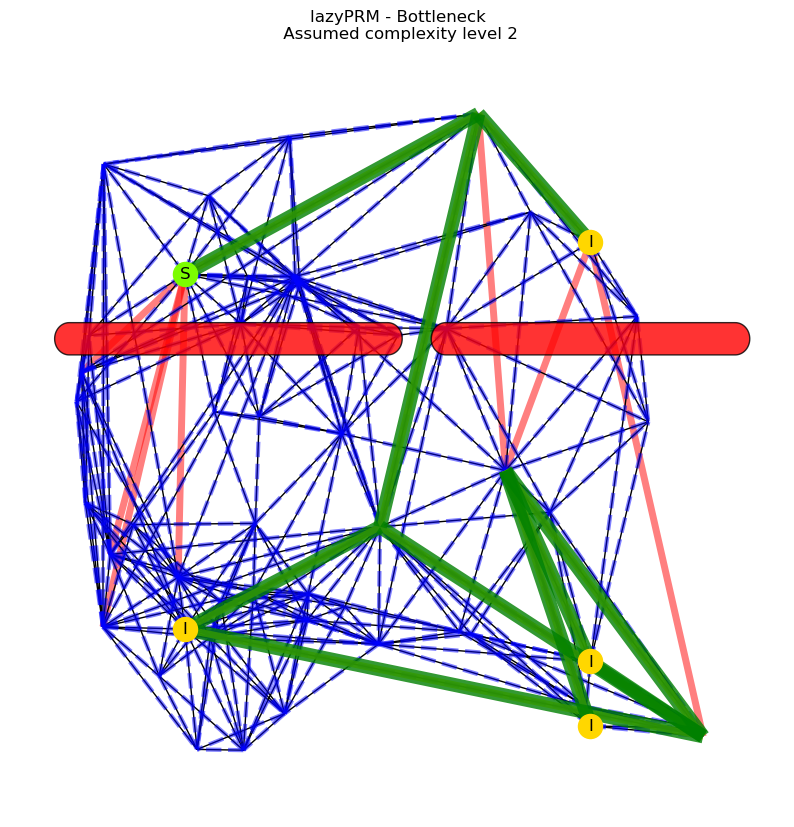

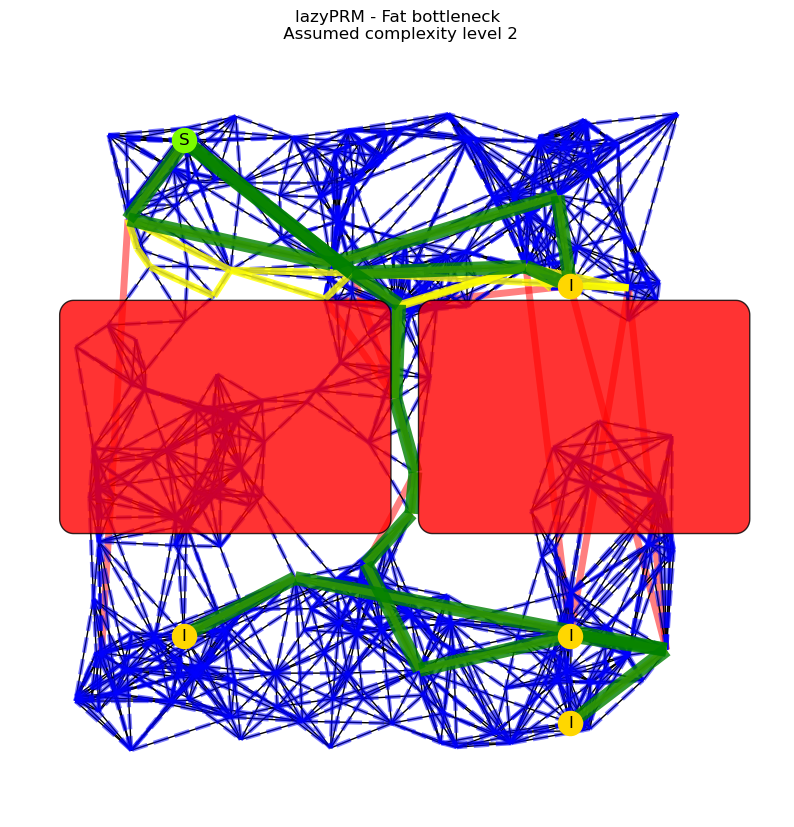

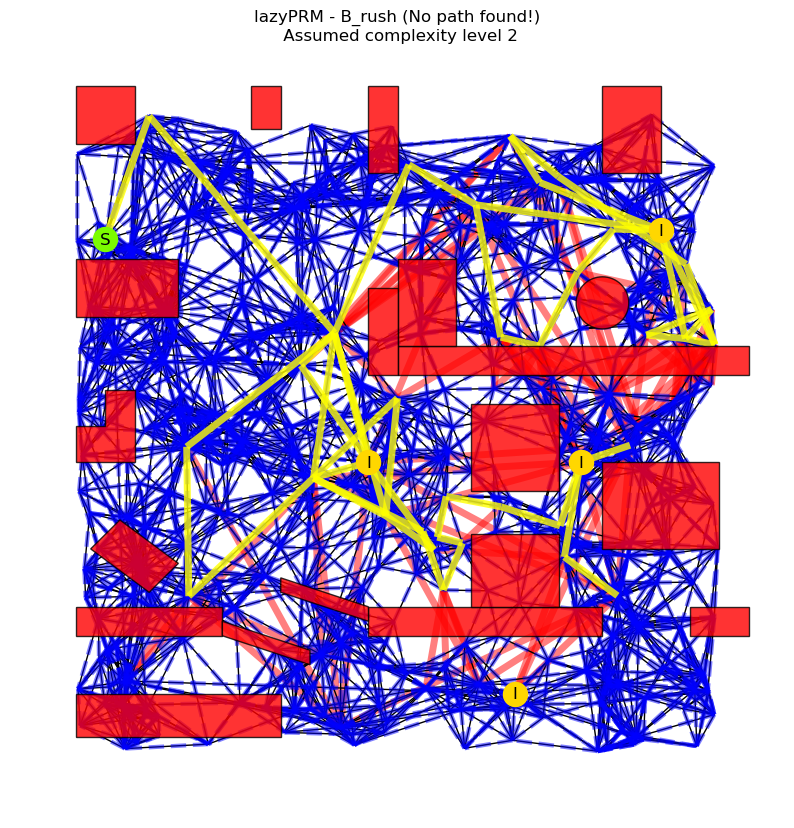

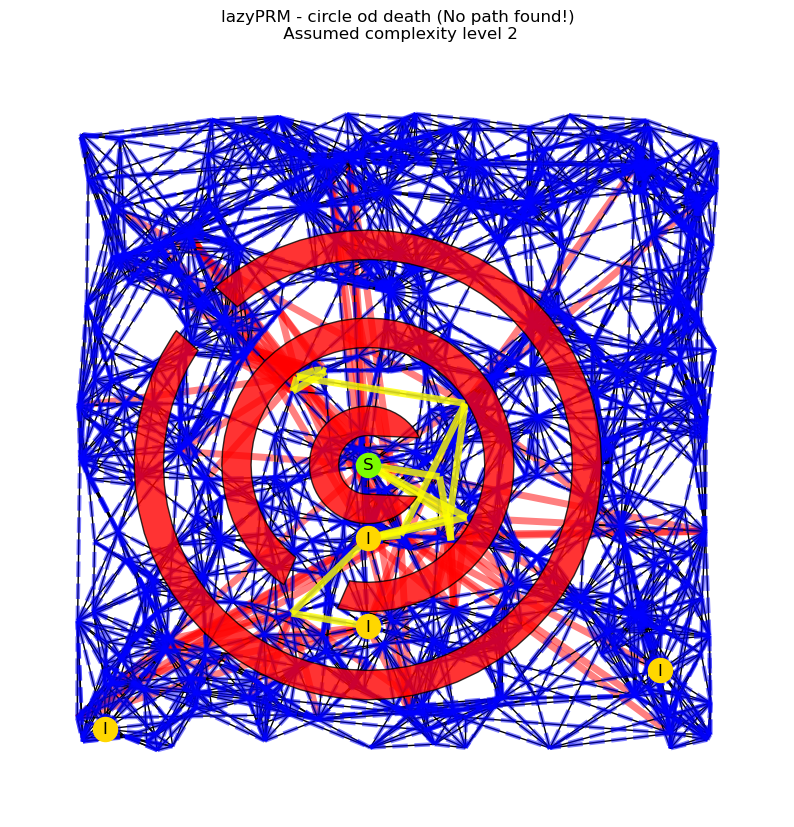

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)


    except Exception as e:
        print ("Error")
        print(e)
        pass
    

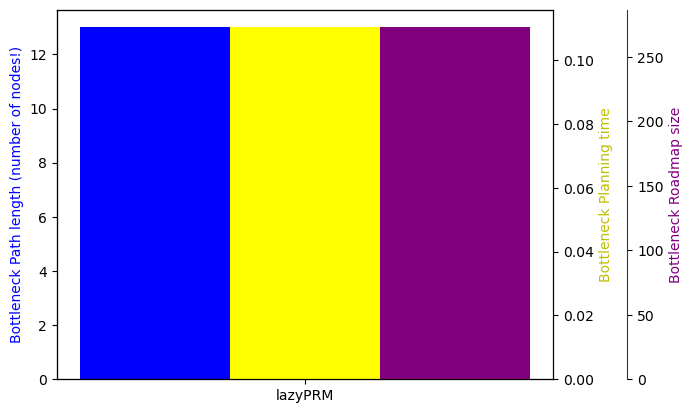

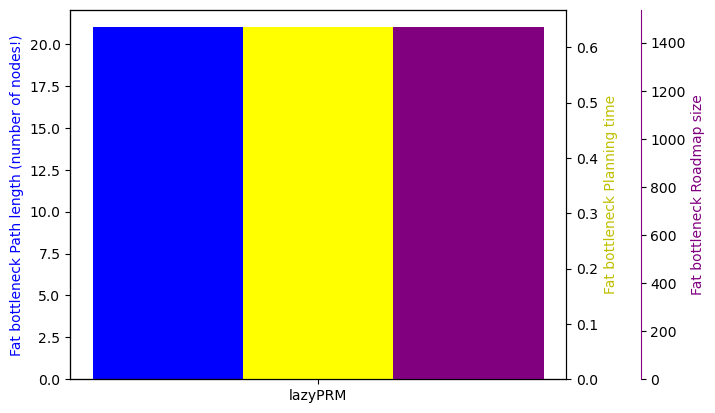

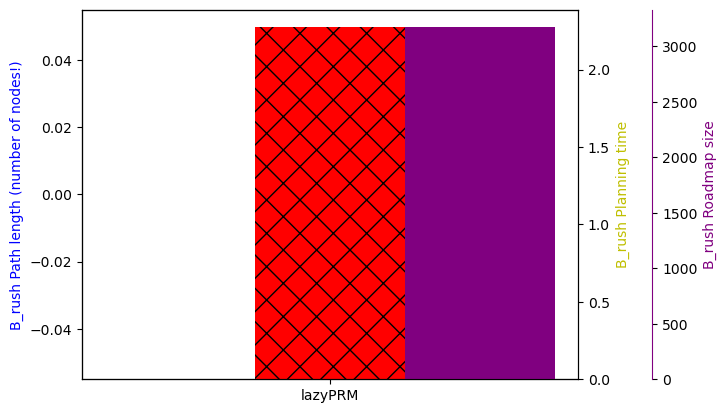

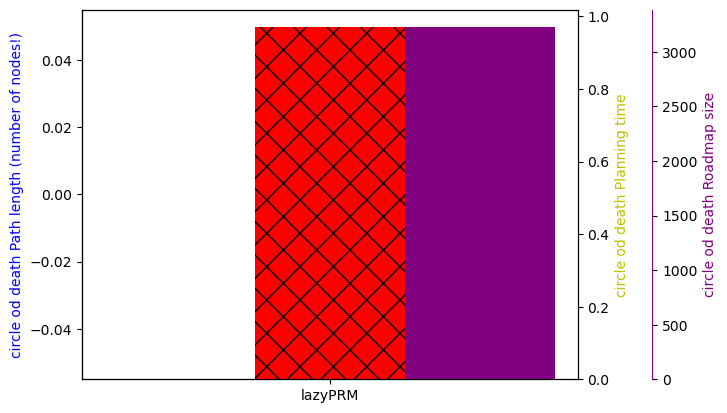

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                                 
_buildRoadmap                0.289469
_checkForCollisionAndUpdate  0.377264
_nearestInterim              0.002953
lineInCollision              0.306356
planRoundPath                0.970090
pointInCollision             0.327663

In [12]:
resultBasic = resultList[:5]
resultVisibility = resultList[5:10]
resultLazy = resultList[10:]

In [13]:
resultBasic[0].perfDataFrame

name                                               args  \
0    _nearestInterim  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x7fe8...   
1    _nearestInterim  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x7fe8...   
2    _nearestInterim  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x7fe8...   
3    _nearestInterim  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x7fe8...   
4    _nearestInterim  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x7fe8...   
..               ...                                                ...   
706  lineInCollision  (<IPEnvironment.CollisionChecker object at 0x7...   
707  lineInCollision  (<IPEnvironment.CollisionChecker object at 0x7...   
708  lineInCollision  (<IPEnvironment.CollisionChecker object at 0x7...   
709  lineInCollision  (<IPEnvironment.CollisionChecker object at 0x7...   
710  lineInCollision  (<IPEnvironment.CollisionChecker object at 0x7...   

    kwargs                                   retVal      time  
0       {}                 [[4, 4], 11.0, interim2]  0.000172  
1       {}  [[18, 16], 5.545417598069425, interim1]  0.000243  
2       {}     [[4, 4], 7.44389355091851, interim2]  0.000103  
3       {}                  [[4, 4], 0.0, interim2]  0.000217  
4       {}  [[18, 3], 14.035668847618199, interim0]  0.000062  
..     ...                                      ...       ...  
706     {}                                    False  0.003285  
707     {}                                     True  0.000634  
708     {}                                    False  0.002532  
709     {}                                    False  0.001881  
710     {}                                    False  0.003015  

[711 rows x 5 columns]

In [14]:
for i in range(len(resultBasic)):
    print(resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())

time    0.243446
dtype: float64
time    1.328918
dtype: float64
time    7.018219
dtype: float64
time    2.273796
dtype: float64


In [15]:
for i in range(len(resultVisibility)):

    print(resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [16]:
for i in range(len(resultLazy)):

    print(resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [17]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

/tmp/ipykernel_87757/2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0

In [18]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

name                                               args kwargs  \
256  planRoundPath  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x7fe8...     {}   

    retVal     time  
256     []  0.97009

In [19]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

/tmp/ipykernel_87757/2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0